In [55]:
# todo:同じ人で連対率はどのくらい変わるのかを可視化する。
# todo:過去の連対率とその後の成績が実際に相関するのかを可視化する。
# warn:いずれも、枠によってバイアスがかからないように注意する。

In [56]:
# 汎用ライブラリのimport
import sys
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [57]:
# 自作ライブラリのimport
if os.environ['BR_HOME']+"/boatrace" not in sys.path:
    sys.path.append(os.environ['BR_HOME']+"/boatrace")
#print(sys.path)

from setup.myUtil import dbHandler

In [58]:
# 分析期間の指定は一旦ここでまとめてみる。
analyzeStartDate="20180101"
analyzeEndDate="20181231"

In [59]:
dbh=dbHandler.getDBHandle()

In [71]:
with dbh.cursor() as cursor:
    sel_sql = "select * from \
               ( select tm.raceId,tr.goalRank,tr.lane from raceresult tr,racemanagement tm \
                 where tr.toban = '4124' \
                 and tm.raceDate between '%s' and '%s' \
                 and tr.raceId = tm.raceId \
                 order by tr.raceId desc ) a \
               order by raceId asc " \
                % (analyzeStartDate,analyzeEndDate)
    cursor.execute(sel_sql)
    resultList=cursor.fetchall()
    

In [72]:
df = pd.io.json.json_normalize(resultList)
df.head()

,goalRank,lane,raceId
0,2,1,20180101-06-05
1,2,5,20180101-06-12
2,2,4,20180102-06-08
3,2,6,20180103-06-02
4,2,4,20180103-06-10


In [73]:
df_av5=df['goalRank'].rolling(5)
df_av5.mean()

0      NaN
1      NaN
2      NaN
3      NaN
4      2.0
5      2.4
6      3.0
7      3.6
8      3.6
9      3.6
10     3.0
11     2.6
12     2.8
13     2.6
14     3.2
15     3.8
16     3.4
17     2.6
18     3.4
19     3.4
20     3.8
21     4.8
22     5.2
23     4.4
24     3.6
25     2.6
26     2.2
27     2.0
28     2.6
29     2.6
      ... 
210    4.6
211    4.8
212    4.8
213    4.8
214    3.8
215    2.8
216    2.4
217    3.2
218    2.6
219    2.8
220    3.8
221    4.0
222    3.6
223    3.6
224    4.0
225    3.6
226    3.6
227    3.6
228    3.8
229    3.6
230    3.2
231    3.0
232    2.8
233    3.4
234    3.8
235    4.2
236    4.0
237    3.6
238    2.8
239    2.8
Name: goalRank, Length: 240, dtype: float64

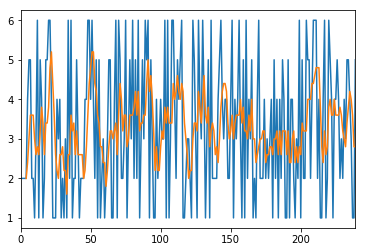

In [74]:
df['goalRank'].plot()
df_av5.mean().plot()


[ 1.00000000e+00 -5.78893240e-02  2.10931023e-02 -1.14607151e-01
  5.36119976e-03 -3.21563538e-02  2.71237426e-02  3.27966507e-02
 -3.71426043e-02 -4.14189688e-02 -6.72905642e-02 -9.87023577e-02
  3.23463893e-02 -2.84630807e-02  8.77598651e-02  2.79257007e-02
  9.37213011e-02 -1.47652461e-01  4.26624115e-04  4.71448262e-03
  4.12682245e-02 -3.00560801e-02  8.65766096e-02  8.39392204e-02
 -9.38780810e-02 -9.00980740e-02 -1.29104412e-02 -3.43729621e-02
  1.03601033e-01 -2.91507242e-03  7.21661309e-02]
[ 1.          0.74519845  0.53574811  0.3048026   0.1251585  -0.08639979
 -0.06937763 -0.11225435 -0.15621267 -0.21246971 -0.21258582 -0.17036871
 -0.05831635 -0.00431224  0.06244563  0.07625063  0.07752867  0.00902814
  0.04273208  0.07740422  0.09844018  0.06384838  0.06077244 -0.01706407
 -0.09749117 -0.12900828 -0.07802216 -0.03688665  0.02918795  0.03556284
  0.05571638]


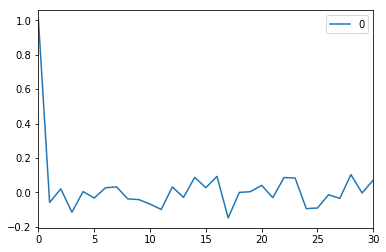

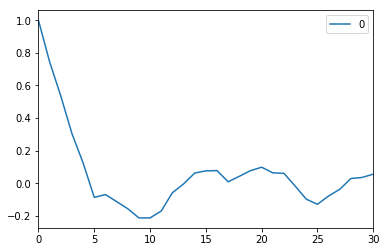

In [75]:
# 自己相関係数を算出
acf = sm.tsa.stattools.acf(df['goalRank'], nlags=30)
print(acf)
pd.DataFrame(acf).plot()
df_av5_2= df_av5.mean().drop([i for i in range(5)])
acf = sm.tsa.stattools.acf(df_av5_2, nlags=30)
pd.DataFrame(acf).plot()
print(acf)